### Objective

As a security/defense analyst, trying to find out the hot zone of terrorism.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [2]:
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)


In [7]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,1.0,0.0
5,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,1,0,Armed Assault,Police,Firearms,0.0,0.0
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,0,0,Assassination,Police,Firearms,0.0,0.0
7,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,1,0,Bombing/Explosion,Utilities,Explosives,0.0,0.0


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 160111 entries, 1 to 181690
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            160111 non-null  int64  
 1   imonth           160111 non-null  int64  
 2   iday             160111 non-null  int64  
 3   country_txt      160111 non-null  object 
 4   region_txt       160111 non-null  object 
 5   provstate        160111 non-null  object 
 6   city             160111 non-null  object 
 7   latitude         160111 non-null  float64
 8   longitude        160111 non-null  float64
 9   success          160111 non-null  int64  
 10  suicide          160111 non-null  int64  
 11  attacktype1_txt  160111 non-null  object 
 12  targtype1_txt    160111 non-null  object 
 13  weaptype1_txt    160111 non-null  object 
 14  nkill            160111 non-null  float64
 15  nwound           160111 non-null  float64
dtypes: float64(4), int64(5), object(7)
mem

In [9]:
df.shape


(160111, 16)

In [10]:
df.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate',
       'city', 'latitude', 'longitude', 'success', 'suicide',
       'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'nkill', 'nwound'],
      dtype='object')

In [11]:
for i in df.columns:
    print(i,end=", ")

iyear, imonth, iday, country_txt, region_txt, provstate, city, latitude, longitude, success, suicide, attacktype1_txt, targtype1_txt, weaptype1_txt, nkill, nwound, 

### Cleaning the data

In [13]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [14]:
df.head()


,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,success,suicide,Attack Type,Target Type,Weapon Type,Killed,Wounded
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,1.0,0.0
5,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,1,0,Armed Assault,Police,Firearms,0.0,0.0
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,0,0,Assassination,Police,Firearms,0.0,0.0
7,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,1,0,Bombing/Explosion,Utilities,Explosives,0.0,0.0


In [15]:
df.isnull().sum()


Year              0
Month             0
Day               0
Country           0
Region            0
Province/State    0
City              0
Latitude          0
Longitude         0
success           0
suicide           0
Attack Type       0
Target Type       0
Weapon Type       0
Killed            0
Wounded           0
dtype: int64

In [16]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [17]:
df.describe()


,Year,Month,Day,Latitude,Longitude,success,suicide,Killed,Wounded,Casualty
count,160111.000000,160111.000000,160111.000000,160111.000000,1.601110e+05,160111.000000,160111.000000,160111.000000,160111.000000,160111.000000
mean,2003.466589,6.483140,15.526085,23.709793,-5.082945e+02,0.880639,0.038099,2.093804,3.199455,5.293259
std,12.729636,3.388316,8.803064,18.304502,2.153901e+05,0.324214,0.191435,9.755815,36.499629,42.597655
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,4.000000,8.000000,11.840929,8.617648e+00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.577061,4.378420e+01,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.621521,6.914701e+01,1.000000,0.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1384.000000,8191.000000,9574.000000


Observation

1.The data consists of terrorist activities ranging from the year: 1970 to 2017

2.Maximum number of people killed in an event were: 1570

3.Maximum number of people wounded in an event were: 8191

4.Maximum number of total casualties in an event were: 9574

### Visualizing the data

1. Year wise Attacks

Number of Attacks in each Year

In [18]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,589
1971,320
1972,221
1973,237
1974,343


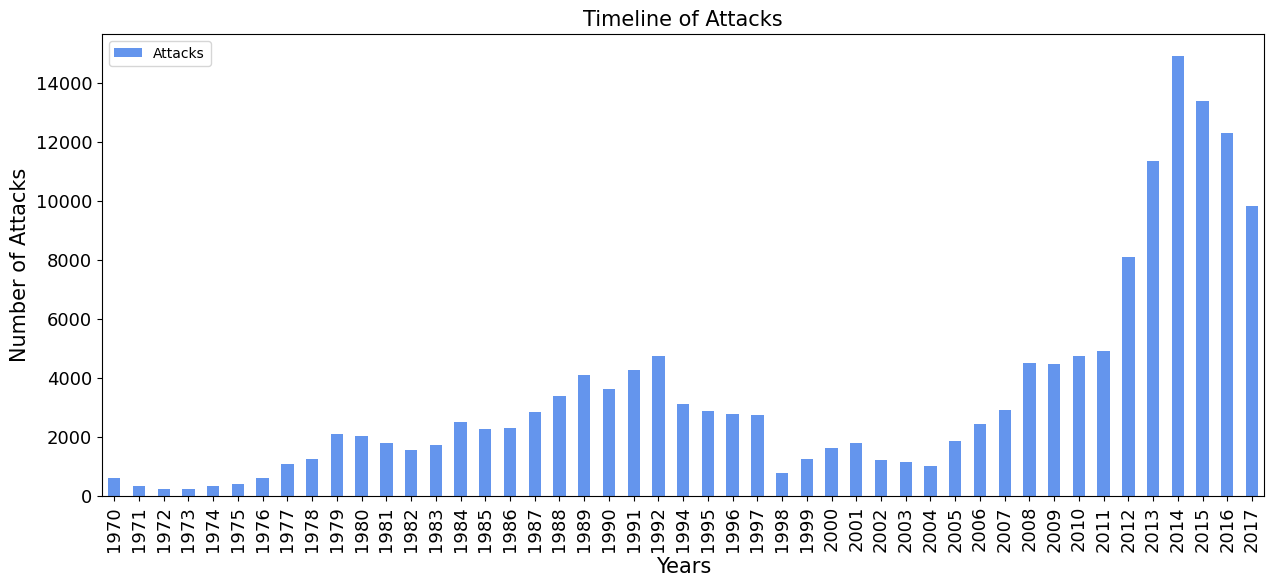

In [19]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

(i). Most number of attacks(16903) in 2014

(ii). Least number of attacks(471) in 1971

### Total Casualties (Killed + Wounded) in each Year

In [20]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,328.0
1971,118.0
1972,567.0
1973,619.0
1974,1119.0


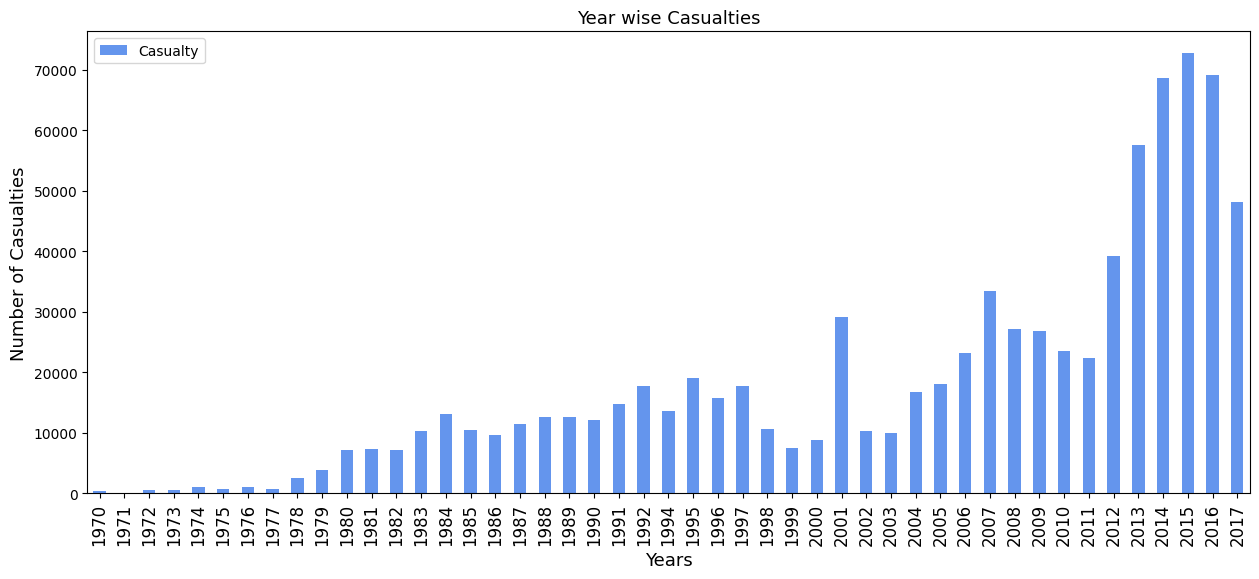

In [21]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

### Killed in each Year

In [22]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,116.0
1971,36.0
1972,165.0
1973,124.0
1974,267.0


### Wounded in each Region


In [23]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,402.0
1973,495.0
1974,852.0


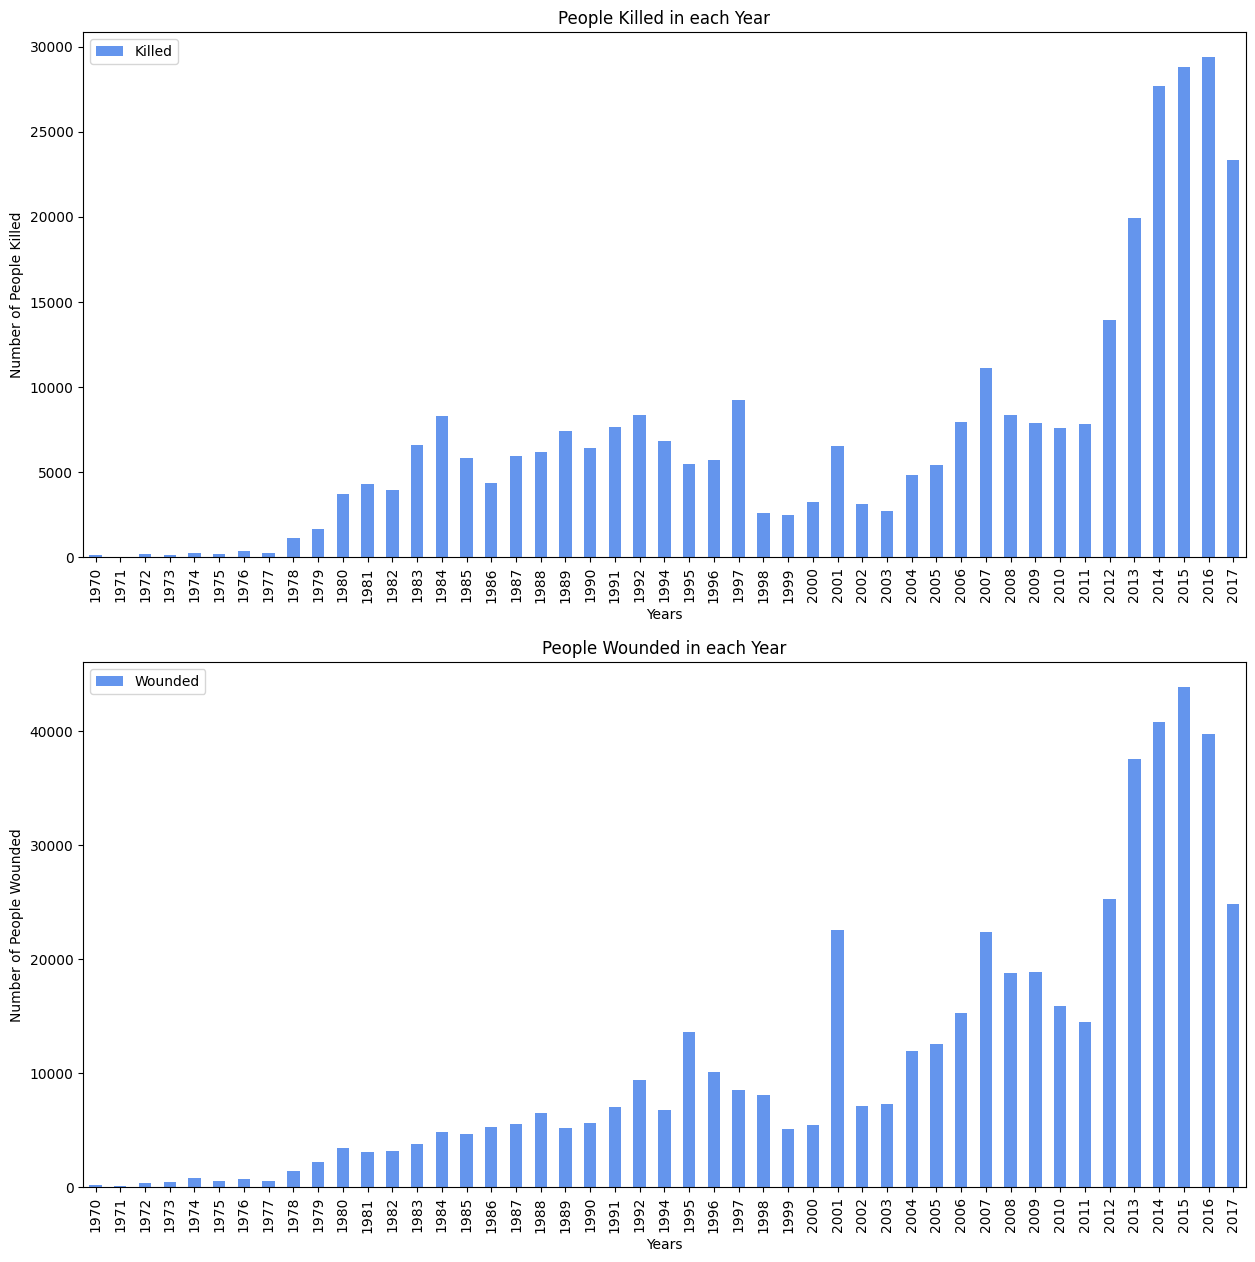

In [24]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Wounded
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### 2. Region wise Attacks

### Distribution of Terrorist Attacks over Regions from 1970-2017

In [25]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,5,0,0,3,21,470,56,1,9,0,23
1971,1,3,0,0,1,28,243,19,0,3,1,21
1972,2,3,0,0,0,40,70,17,1,14,4,70
1973,1,5,0,2,1,14,63,65,1,1,3,81
1974,1,9,0,3,2,31,100,68,2,3,4,120


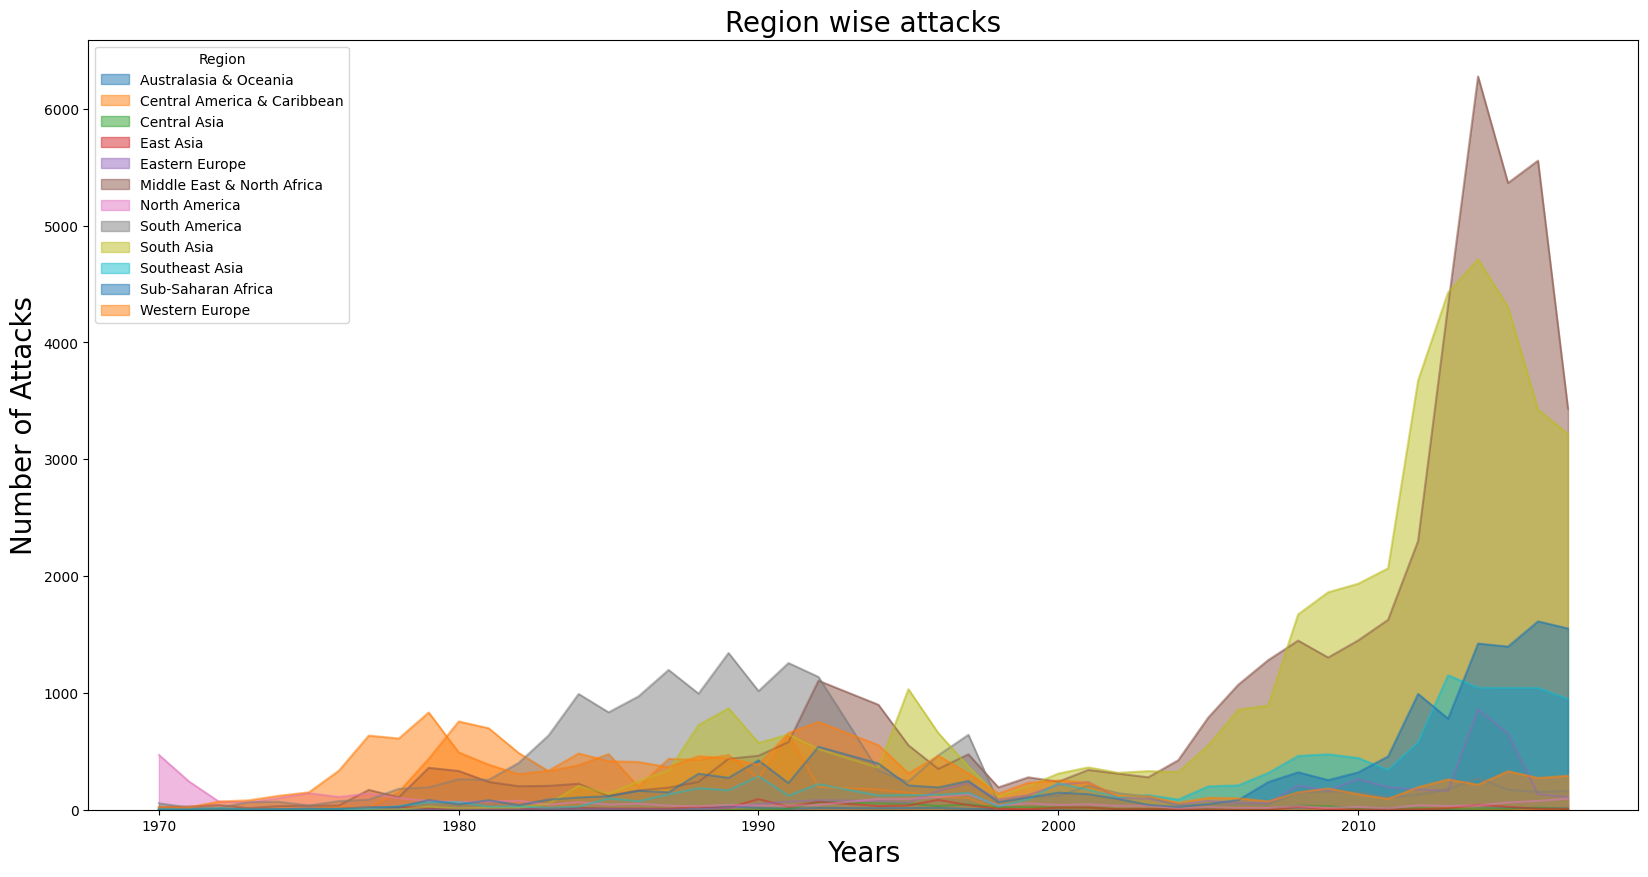

In [26]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

### Total Terrorist Attacks in each Region from 1970-2017

In [27]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Middle East & North Africa     45882
South Asia                     42369
South America                  16297
Western Europe                 13930
Sub-Saharan Africa             13843
Southeast Asia                 11181
Central America & Caribbean     7051
Eastern Europe                  4776
North America                   3303
East Asia                        714
Central Asia                     520
Australasia & Oceania            245
Name: Total, dtype: int64

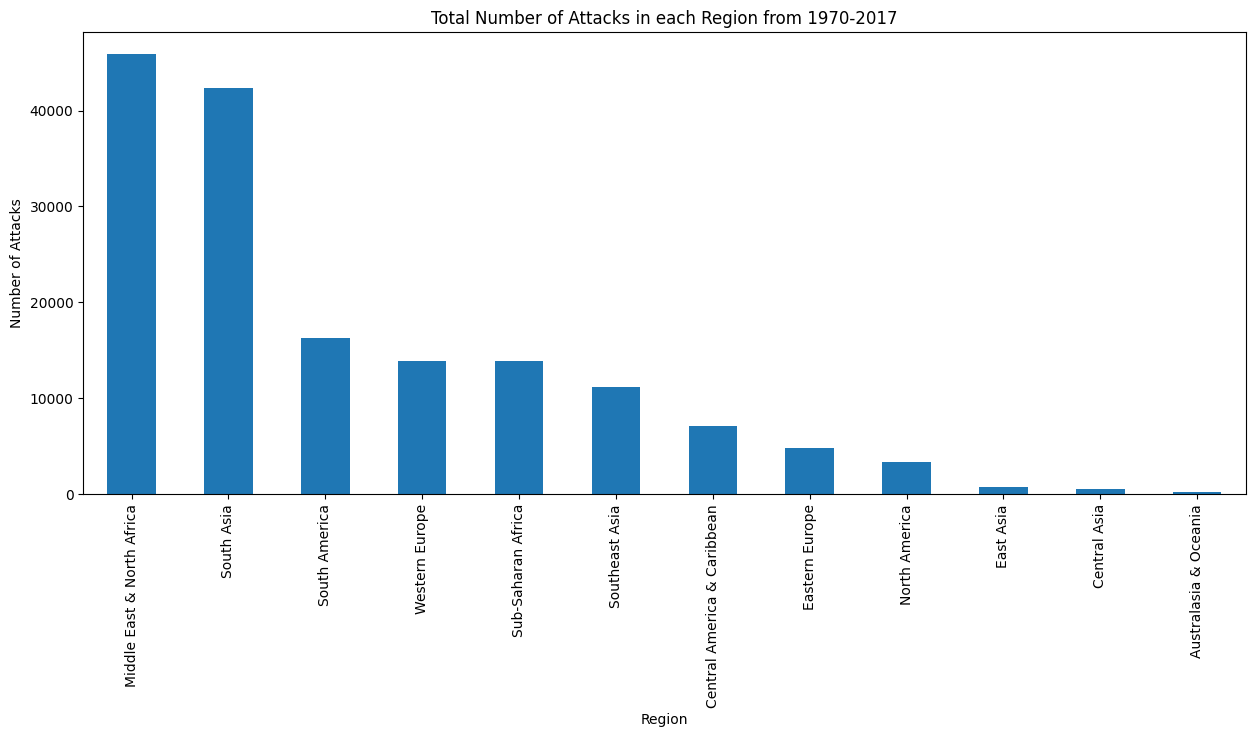

In [28]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

### Total Casualties (Killed + Wounded) in each Region


In [29]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Middle East & North Africa,325298.0
South Asia,230455.0
Sub-Saharan Africa,104478.0
South America,40716.0
Southeast Asia,36400.0
Central America & Caribbean,30296.0
North America,26361.0
Western Europe,22668.0
Eastern Europe,17978.0


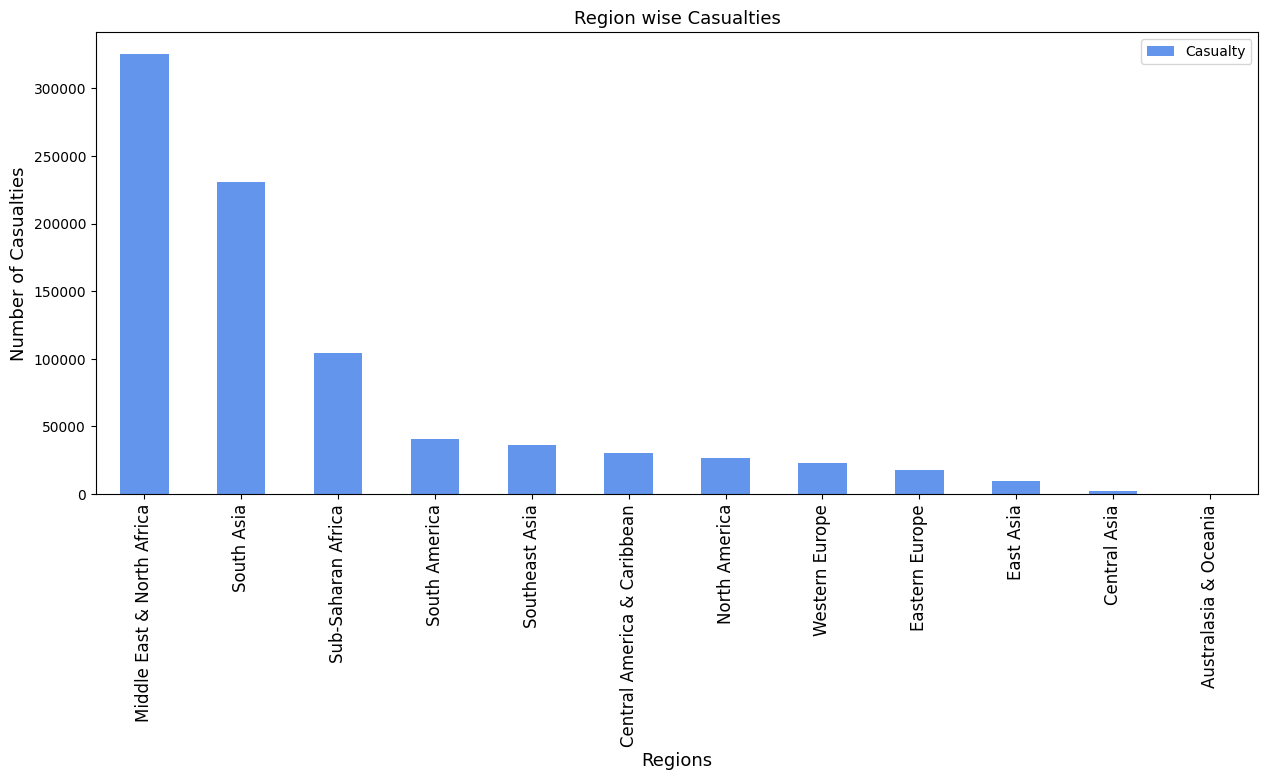

In [30]:
rc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

### Killed in each Region


In [31]:
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Middle East & North Africa,113415.0
South Asia,91859.0
Sub-Saharan Africa,53402.0
South America,24585.0
Central America & Caribbean,22255.0
Southeast Asia,12343.0
Eastern Europe,6179.0
North America,4849.0
Western Europe,4592.0


### Wounded in each Region


In [32]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

,Wounded
Region,
Middle East & North Africa,211883.0
South Asia,138596.0
Sub-Saharan Africa,51076.0
Southeast Asia,24057.0
North America,21512.0
Western Europe,18076.0
South America,16131.0
Eastern Europe,11799.0
East Asia,9015.0


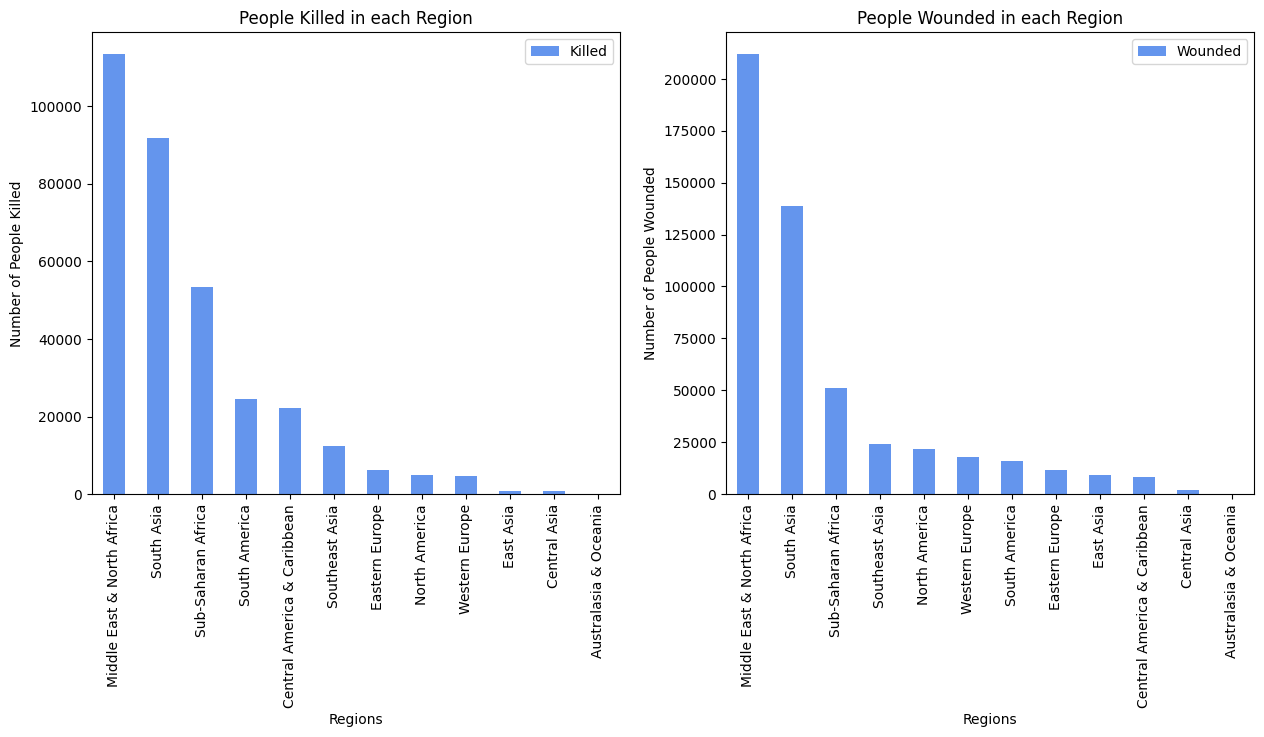

In [33]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#Wounded
rw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### 3. Attack Type wise Attacks

### Number of Attacks by each Attack Type


In [35]:
at=df["Attack Type"].value_counts()
at

Bombing/Explosion                      81043
Armed Assault                          36643
Assassination                          17384
Facility/Infrastructure Attack          9458
Hostage Taking (Kidnapping)             7583
Unknown                                 5763
Unarmed Assault                          884
Hostage Taking (Barricade Incident)      805
Hijacking                                548
Name: Attack Type, dtype: int64

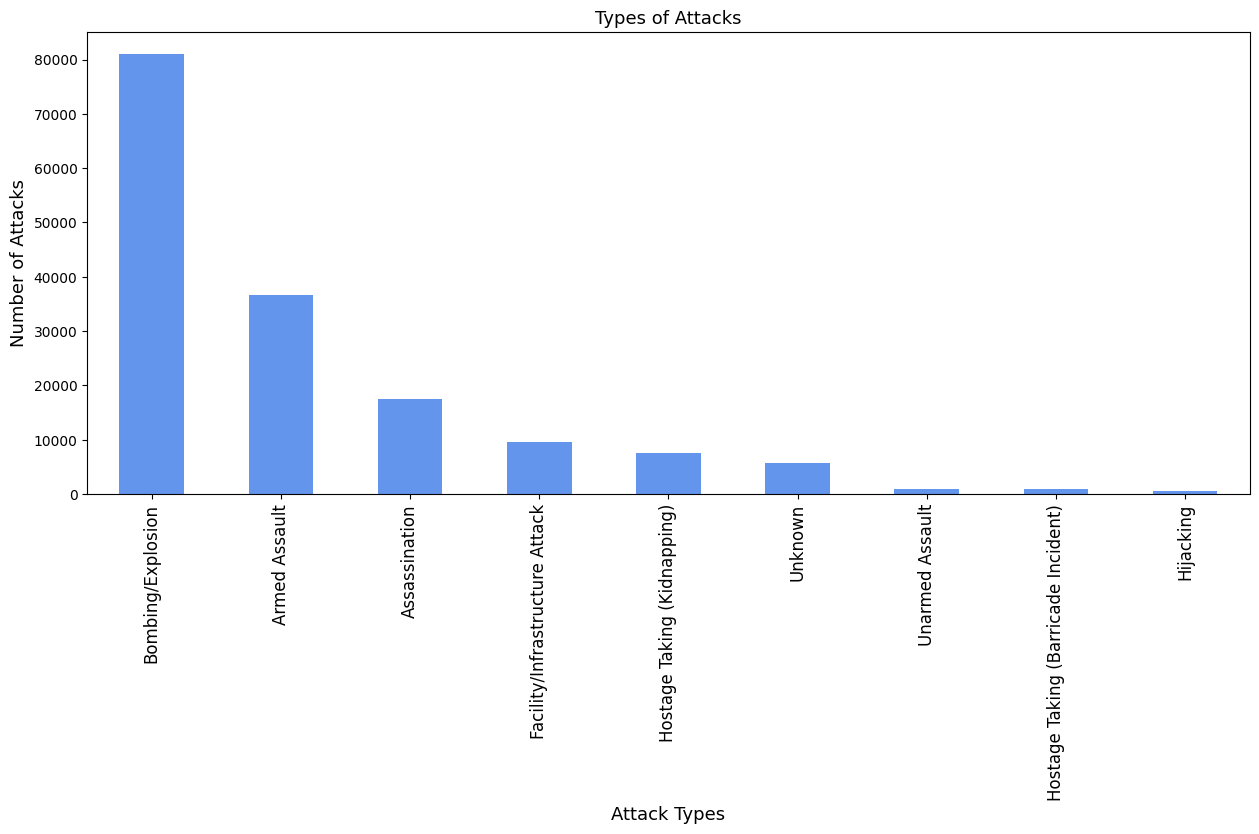

In [36]:
at.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

### Total Casualties (Killed + Wounded) by each Attack Type


In [37]:
ac=df[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False)
ac

,Casualty
Attack Type,
Bombing/Explosion,507712.0
Armed Assault,199043.0
Unknown,36615.0
Assassination,35787.0
Hijacking,20499.0
Hostage Taking (Kidnapping),19834.0
Unarmed Assault,14530.0
Hostage Taking (Barricade Incident),7422.0
Facility/Infrastructure Attack,6067.0


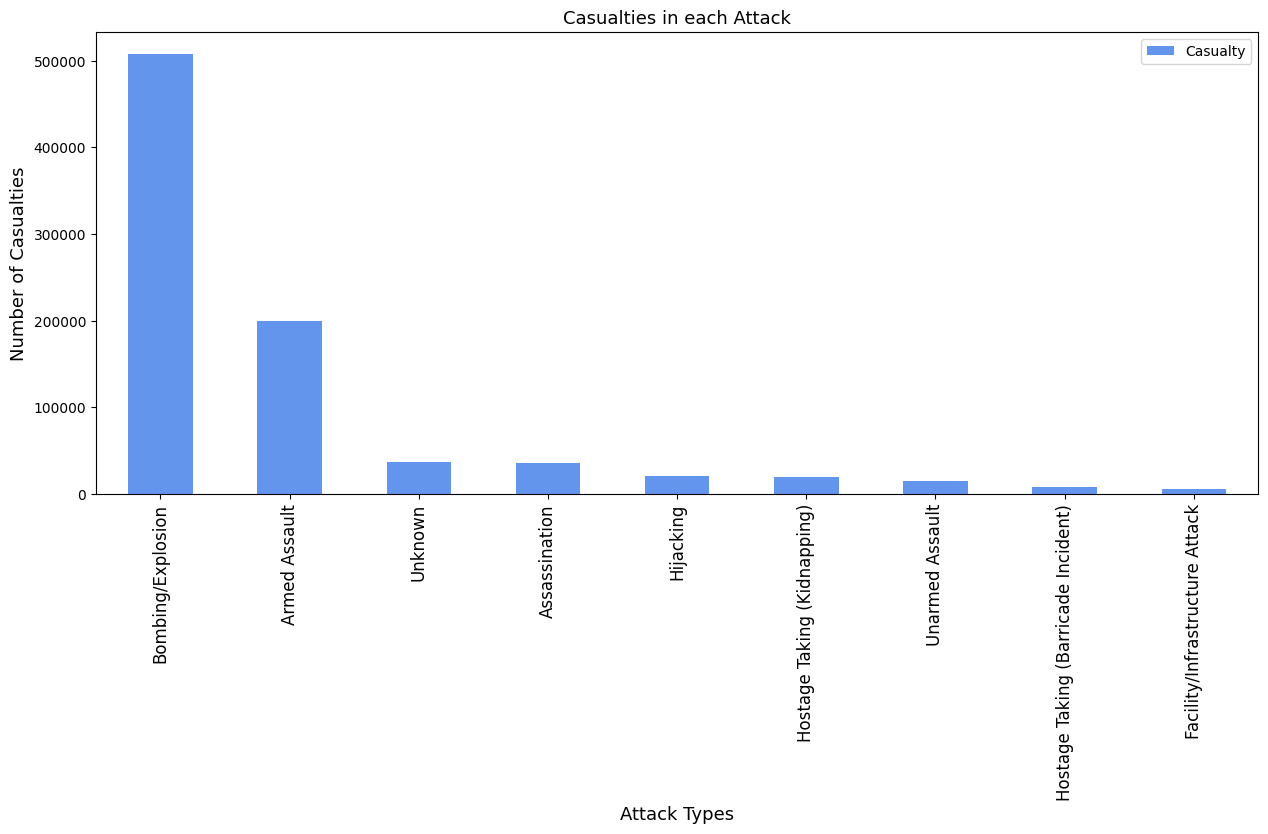

In [38]:
ac.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Attack",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

### Killed by each Attack Type


In [39]:
ak=df[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False)
ak

,Killed
Attack Type,
Bombing/Explosion,140349.0
Armed Assault,125274.0
Unknown,23249.0
Assassination,22285.0
Hostage Taking (Kidnapping),13801.0
Hijacking,3520.0
Hostage Taking (Barricade Incident),3500.0
Facility/Infrastructure Attack,2527.0
Unarmed Assault,736.0


### Wounded by each Attack Type


In [40]:
aw=df[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False)
aw

,Wounded
Attack Type,
Bombing/Explosion,367363.0
Armed Assault,73769.0
Hijacking,16979.0
Unarmed Assault,13794.0
Assassination,13502.0
Unknown,13366.0
Hostage Taking (Kidnapping),6033.0
Hostage Taking (Barricade Incident),3922.0
Facility/Infrastructure Attack,3540.0


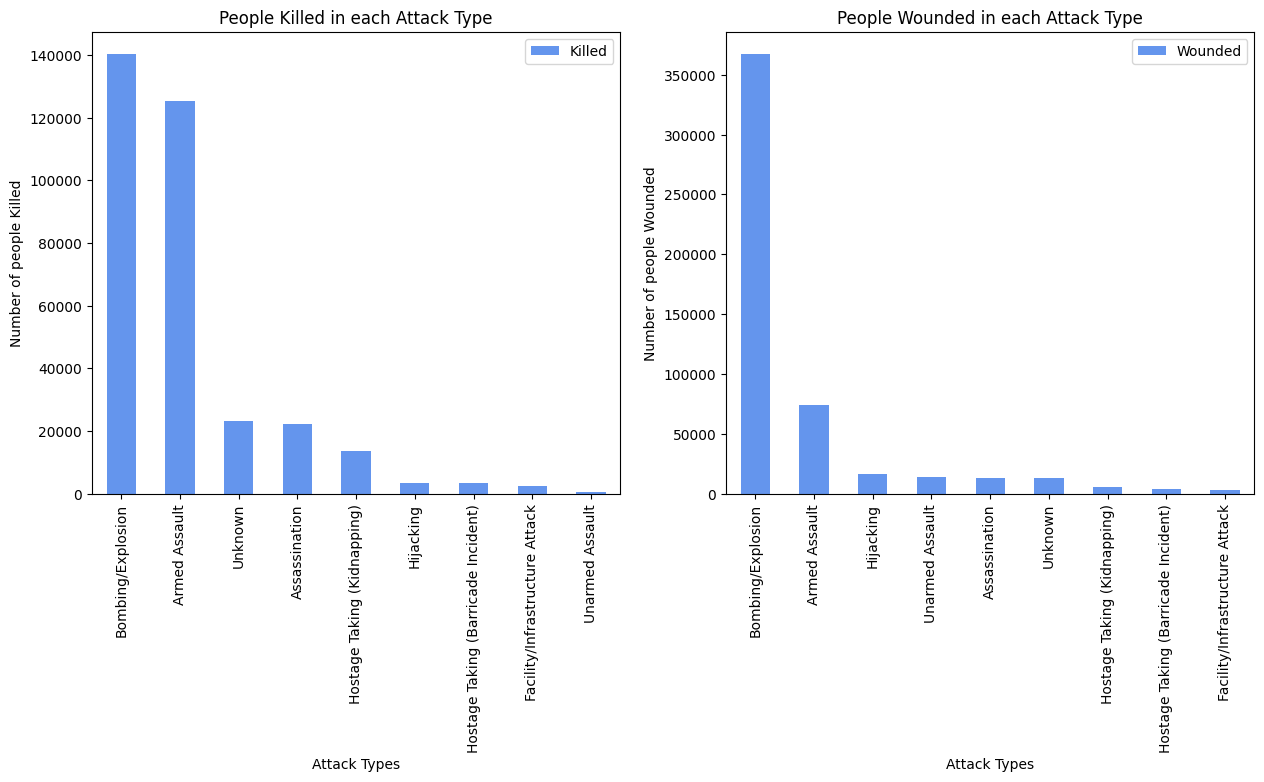

In [41]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ak.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
aw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

### 4. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017


### Total Casualties (Killed + Wounded) due to Terrorist Attacks


In [43]:
casualty=df.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 847509.0


### Killed due to Terrorist Attacks


In [44]:
kill=df.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 335241.0


### Wounded due to Terrorist Attacks


In [45]:
wound=df.loc[:,"Wounded"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 512268.0


Observations

Year wise Attacks :

  (i) Attacks

    (a) Most number of attacks: 16903 in 2014

    (b) Least number of attacks: 471 in 1971

  (ii) Casualties

    (a) Most number of casualties: 85618 in 2014

    (b) Least number of casualties: 255 in 1971

  (iii) Killed

    (a) Most number of people killed: 44490 in 2014

    (b) Least number of people killed: 173 in 1971

  (iv) Wounded

    (a) Most number of people wounded: 44043 in 2015

    (b) Least number of people wounded: 82 in 1971


2. Region wise Attacks :

  (i) Attacks

    (a) Most number of attacks: 50474 in "Middle East & North Africa"

    (b) Least number of attacks: 282 in "Australasia & Oceania"
  (ii) Casualties

    (a) Most number of casualties: 351950 in "Middle East & North Africa"

    (b) Least number of casualties: 410 in Australasia & Oceania
  (iii) Killed

    (a) Most number of people killed: 137642 in "Middle East & North Africa"

    (b) Least number of people killed: 150 in "Australasia & Oceania"

  (iv) Wounded

    (a) Most number of people wounded: 214308 in "Middle East & North Africa"

    (b) Least number of people wounded: 260 in "Australasia & Oceania"

3. Attack Type wise Attacks:

  (i) Attacks

    (a) Most number of attacks : 88255 by "Bombing/Explosion"

    (b) Least number of attacks : 659 by "Hijacking"

  (ii) Casualties

    (a) Most number of casualties : 530007 by "Bombing/Explosion"

    (b) Least number of casualties : 7407 by "Facility/Infrastructure Attack"

  (iii) Killed

    (a) Most number of people killed : 160297 by "Armed Assault"

    (b) Least number of people killed : 880 by "Unarmed Assault"

  (iv) Wounded

    (a) Most number of people wounded : 372686 by "Bombing/Explosion"

    (b) Least number of people wounded : 3765 by "Facility/Infrastructure Attack"

4. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017 :

  (i) Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world : 935737

  (ii) Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world : 411868

  (iii) Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world : 523869